# NumPy, matplotlib, PyTorch Tensor 튜토리얼

> 본 튜토리얼은 [cs231n 튜토리얼](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)과 해당 튜토리얼의 [한국어 번역본](https://github.com/aikorea/cs231n/blob/master/python-numpy-tutorial.md)을 참고하여 제작되었습니다.

# [Numpy](https://github.com/numpy/numpy) 

<img src="https://github.com/numpy/numpy/raw/main/branding/logo/primary/numpylogo.svg" height=120>

NumPy는 Python을 사용한 과학적 컴퓨팅을 위한 기본 패키지

다음과 같은 기능을 제공

- 강력한 N차원 배열 객체
- brodacasting 기능
- C/C++ 및 Fortran 코드 통합을 위한 도구
- 유용한 선형 대수학, 푸리에 변환 및 난수 기능

<br><br>


NumPy를 사용하기 위해 우선 `numpy` 패키지를 import합니다.

In [94]:
# import numpy package
import numpy as np

## [배열] 
Numpy 배열은 동일한 자료형을 가지는 값들이 격자판 형태로 있는 것입니다. 각각의 값들은 튜플(이때 튜플은 양의 정수만을 요소값으로 갖습니다.) 형태로 색인 됩니다. 
- rank는 배열이 몇 차원인지를 의미
- shape는 는 각 차원의 크기를 알려주는 정수들이 모인 튜플

파이썬의 리스트를 중첩해 Numpy 배열을 초기화 할 수 있고, 대괄호를 통해 각 요소에 접근할 수 있습니다:

### 1D 배열 생성

In [95]:
# 1-dim numpy array

a = np.array([1, 2, 3]) 
print(a)      

[1 2 3]


In [96]:
# rank, shape

a.ndim, a.shape

(1, (3,))

### 1D 배열 인덱스를 통한 원소 접근 및 수정

In [97]:
# 인덱스를 통한 원소 접근

print(type(a),a[0],a[1],a[2])
print(a)

# 원소 값 수정
a[0]=5      
print(a)

<class 'numpy.ndarray'> 1 2 3
[1 2 3]
[5 2 3]


### 2D 배열 생성

In [98]:
# 2-dim numpy array

b = np.array([[1,2,3],[4,5,6]])   
print(b)

[[1 2 3]
 [4 5 6]]


In [99]:
# rank, shape

b.ndim, b.shape

(2, (2, 3))

### 2D 배열 인덱스를 통한 원소 접근 및 수정

In [100]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


## [특수한 배열]

### 1. 영행렬

In [101]:
print(np.zeros((2,2)))  # 영행렬 생성

[[0. 0.]
 [0. 0.]]


### 2. 유닛행렬

In [102]:
print(np.ones((1,2)))   # Create an array of all ones

[[1. 1.]]


### 3. 모든 원소값이 특정 값으로 정해진 행렬

In [103]:
print(np.full((2,2), 7)) # Create a constant array

[[7 7]
 [7 7]]


### 4. 단위행렬

In [104]:
print(np.eye(3)) # 단위행렬

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 5. 임의의 값 행렬

In [105]:
print(np.random.random((2,2)))

[[0.53747471 0.30306305]
 [0.0397946  0.78520969]]


## [배열 인덱싱]

### Slicing
파이썬 리스트와 유사하게, Numpy 배열도 슬라이싱이 가능합니다. Numpy 배열은 다차원인 경우가 많기에, 각 차원별로 어떻게 슬라이스할건지 명확히 해야 합니다:

In [106]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


슬라이싱된 배열은 원본 배열과 같은 데이터를 참조합니다, 즉 슬라이싱된 배열을 수정하면 원본 배열 역시 수정됩니다.

In [107]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


### Boolean Array Indexing
Boolean array indexing을 통해 배열 속 요소를 취사선택할 수 있습니다. Boolean array indexing은 특정 조건을 만족하게 하는 요소만 선택하고자 할 때 자주 사용됩니다.:

In [108]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [109]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


## [자료형]

Numpy 배열은 동일한 자료형을 가지는 값들이 격자판 형태로 있는 것입니다. Numpy에선 배열을 구성하는 데 사용할 수 있는 다양한 숫자 자료형을 제공합니다. Numpy는 배열이 생성될 때 자료형을 스스로 추측합니다, 그러나 배열을 생성할 때 명시적으로 특정 자료형을 지정할 수도 있습니다. 

In [110]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int32)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int32


## [배열 연산]
기본적인 수학함수는 배열의 각 요소별로 동작하며 연산자를 통해 동작하거나 numpy 함수모듈을 통해 동작합니다:

In [111]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [112]:
# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [113]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [114]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [115]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [116]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


`*`은 행렬의 곱셈이 아닌 element wise 곱셈이므로 행렬곱을 구하기 위해서는 `dot`연산을 사용

In [117]:
x = np.array([[1,2],
              [3,4]])
y = np.array([[5,6],
              [7,8]])

v = np.array([9, 10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


Python 3.5 버전부터 추가된 `@`연산자를 이용하여 행렬의 곱셈을 수행 가능

In [118]:
print(v @ w)

219


In [119]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [120]:
x@y,(x@y).shape

(array([[19, 22],
        [43, 50]]),
 (2, 2))

## [브로드캐스팅]
1. 두 배열이 동일한 rank를 가지고 있지 않다면, 낮은 rank의 1차원 배열이 높은 rank 배열의 shape로 간주합니다.
2. 특정 차원에서 두 배열이 동일한 크기를 갖거나, 두 배열 중 하나의 크기가 1이라면 그 두 배열은 특정 차원에서 compatible하다고 여겨집니다.
3. 두 행렬이 모든 차원에서 compatible하다면, 브로드캐스팅이 가능합니다.
4. 브로드캐스팅이 이뤄지면, 각 배열 shape의 요소별 최소공배수로 이루어진 shape가 두 배열의 shape로 간주합니다.
5. 차원에 상관없이 크기가 1인 배열과 1보다 큰 배열이 있을 때, 크기가 1인 배열은 자신의 차원 수만큼 복사되어 쌓인 것처럼 간주합니다.

In [121]:
# 행렬 x의 각 행에 벡터 v를 더한 뒤,
# 그 결과를 행렬 y에 저장하고자 합니다
x = np.array([[1,2,3], 
              [4,5,6], 
              [7,8,9], 
              [10,11,12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # x와 동일한 shape를 가지며 비어있는 행렬 생성

# 명시적 반복문을 통해 행렬 x의 각 행에 벡터 v를 더하는 방법
for i in range(4):
    y[i, :] = x[i, :] + v

# 이제 y는 다음과 같습니다
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [122]:
# 벡터 v를 행렬 x의 각 행에 더한 뒤,
# 그 결과를 행렬 y에 저장하고자 합니다
x = np.array([[1,2,3], 
              [4,5,6], 
              [7,8,9], 
              [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))  # v의 복사본 4개를 위로 차곡차곡 쌓은 것이 vv
print(vv)                 # 출력 "[[1 0 1]
                         #       [1 0 1]
                         #       [1 0 1]
                         #       [1 0 1]]"
y = x + vv  # x와 vv의 요소별 합
print(y) # 출력 "[[ 2  2  4
         #       [ 5  5  7]
         #       [ 8  8 10]
         #       [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [123]:
# 벡터 v를 행렬 x의 각 행에 더한 뒤,
# 그 결과를 행렬 y에 저장하고자 합니다
x = np.array([[1,2,3], 
              [4,5,6], 
              [7,8,9], 
              [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # 브로드캐스팅을 이용하여 v를 x의 각 행에 더하기
print(y) # 출력 "[[ 2  2  4]
         #       [ 5  5  7]
         #       [ 8  8 10]
         #       [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


## [많이 사용하는 함수]

`transpose`, `reshape`, `concat`, `vstack`, `hstack`, `stack`, `squeeze`, `expand_dim`(`unsqueeze`)

### transpose

In [124]:
x = np.array([[1,2,3], [4,5,6]])
print(x.T)
print(np.transpose(x))

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


### reshape

In [125]:
x = np.array([[1,2,3], [4,5,6]])
print(x, x.shape)
x = x.reshape(3,2)
print(x,x.shape)

[[1 2 3]
 [4 5 6]] (2, 3)
[[1 2]
 [3 4]
 [5 6]] (3, 2)


### concat

In [126]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [127]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### vstack

In [128]:
x = np.array([[1, 2], 
              [3, 4]])
y = np.array([[5, 6], 
              [7, 8]])
np.vstack((x,y))    # 행결합

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [129]:
np.concatenate((x, y), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

### hstack

In [130]:
x = np.array([[1, 2], 
              [3, 4]])
y = np.array([[5, 6], 
              [7, 8]])
np.hstack((x,y))    # 열결합

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [131]:
np.concatenate((x, y), axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

### stack
- stack 함수는 지정한 axis를 완전히 새로운 axis로 생각
- 지정한 axis 기준으로 reshape 후 concatenate

In [132]:
a = np.array([[1, 2], 
              [3, 4]]) # a.shape=(2, 2)
b = np.array([[5, 6]]) # b.shape=(2, 1)

In [133]:
# np.stack((a, b), axis=0) 

In [134]:
a = np.array([[1, 2], 
              [3, 4]]) # a.shape=(2, 2)
b = np.array([[5, 6], 
              [7, 8]]) # b.shape=(2, 2)

In [135]:
c = np.stack((a, b), axis=0) 
print(c, c.shape)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] (2, 2, 2)


In [136]:
c = np.stack((a, b), axis=1) 
print(c, c.shape)

[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]] (2, 2, 2)


In [137]:
c = np.stack((a, b), axis=2) 
print(c, c.shape)

[[[1 5]
  [2 6]]

 [[3 7]
  [4 8]]] (2, 2, 2)


### squeeze

In [138]:
a = np.array([[1,2,3]])
print(a, a.shape)
a= a.squeeze(0)
print(a, a.shape)

[[1 2 3]] (1, 3)
[1 2 3] (3,)


### expand_dims

In [139]:
a = np.array([1,2,3])
print(a, a.shape)
a= np.expand_dims(a,0)
print(a, a.shape)

[1 2 3] (3,)
[[1 2 3]] (1, 3)


# Matplotlib

Matplotlib는 plotting 라이브러리입니다. 이번에는 MATLAB의 plotting 시스템과 유사한 기능을 제공하는 `matplotlib.pyplot` 모듈에 관한 간략한 소개가 있겠습니다.,

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline  

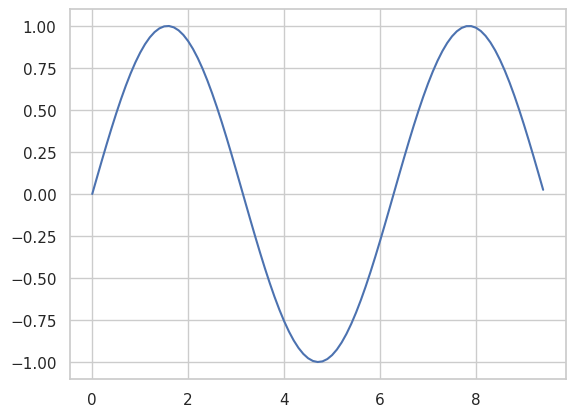

In [141]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

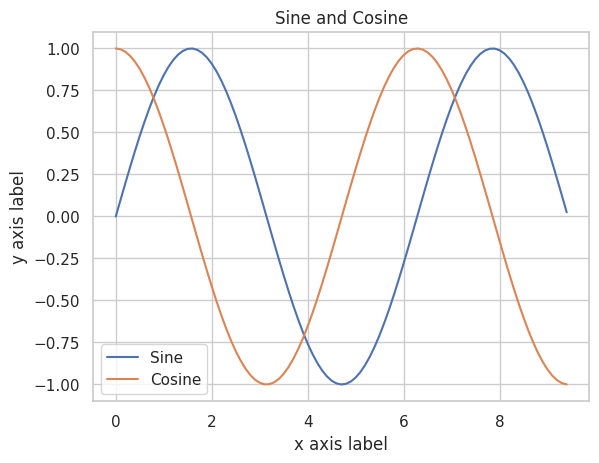

In [142]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

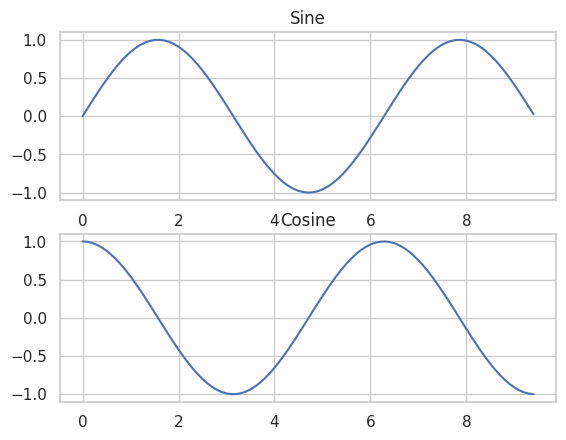

In [143]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

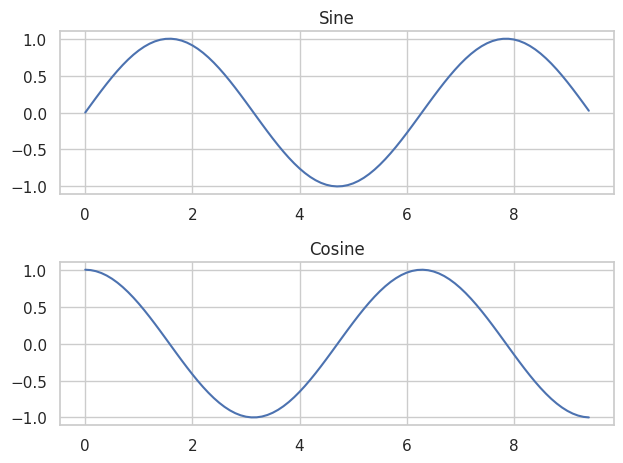

In [144]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.tight_layout()
plt.show()

## numpy 와 matplotlib 을 이용한 음성신호 생성  및 시각화

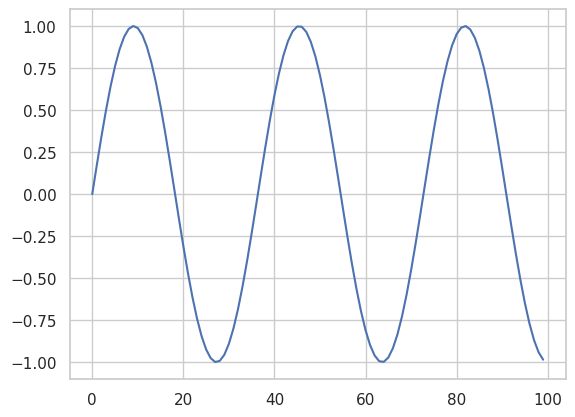

In [145]:
sr = 16000
dur = 3
F = 440
t = np.arange(dur*sr)/sr
sig = np.sin(2*t*np.pi*440) 
plt.plot(sig[:100])

In [146]:
import IPython.display as ipd

In [147]:
ipd.Audio(sig,rate=sr)

## 연습문제
A4(4옥타브 라)에 해당하는 주파수는 440Hz이다.

C4~C5에 해당하는 주파수가 아래와 같이 주어졌을때

진폭과 주파수가 1초단위로 변경하는 음성 샘플을 생성하라

In [148]:
#Frequency(Hz) of C4 to C5 scales
scales = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25] 
sr = 16000
dur = 1
t = np.arange(dur*sr)/sr
x = []


In [149]:
ipd.Audio(x,rate=sr)

ValueError: zero-size array to reduction operation maximum which has no identity

# PyTorch Tensor
텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조를 가집니다.

## [파이토치 텐서]

In [150]:
import torch

### 1D 배열 생성

In [151]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [152]:
print(t.dim())  # rank
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


### 1D 배열 인덱스를 통한 원소 접근 및 슬라이싱

In [153]:
print(t[0], t[1], t[-1])  
print(t[2:4], t[:2])       

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3.]) tensor([0., 1.])


### 2D 배열 생성

In [154]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [155]:
print(t.dim())  # rank
print(t.size()) # shape

2
torch.Size([4, 3])


### 2D 배열 인덱스를 통한 원소 접근 및 슬라이싱

In [156]:
print(t[:, 1]) 
print(t[:, 1].size()) 

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [157]:
print(t[:, :-1])

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


## [브로드캐스팅]

In [158]:
m1 = torch.Tensor([[1, 2]])
m2 = torch.Tensor([[3, 4]])
print(m1 + m2)

tensor([[4., 6.]])


In [159]:
m1 = torch.Tensor([[1, 2]])
m2 = torch.Tensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [160]:
m1 = torch.Tensor([[1, 2]])
m2 = torch.Tensor([[3], [4]])
print(m1 + m2)


# [1, 2]
# ==> [[1, 2],
#      [1, 2]]
# [3]
# [4]
# ==> [[3, 3],
#      [4, 4]]

tensor([[4., 5.],
        [5., 6.]])


## [텐서 연산]

### matrix multiplication , multiplication

In [161]:
m1 = torch.Tensor([[1, 2], 
                   [3, 4]])
m2 = torch.Tensor([[1], 
                   [2]])
print(m1.matmul(m2)) # 2 x 1

tensor([[ 5.],
        [11.]])


In [162]:
m1 = torch.Tensor([[1, 2], 
                   [3, 4]])
m2 = torch.Tensor([[1], 
                   [2]])
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


### Mean

In [163]:
t = torch.Tensor([1, 2])
print(t.mean())

tensor(1.5000)


In [164]:
t = torch.Tensor([[1, 2], 
                  [3, 4]])
print(t.mean())     

tensor(2.5000)


In [165]:
print(t.mean(dim=0))    # 행을 제거하고 열만 남긴다. 

tensor([2., 3.])


In [166]:
print(t.mean(dim=1))    # 열을 제거하고 행만 남긴다. 

tensor([1.5000, 3.5000])


### Sum

In [167]:
t = torch.Tensor([[1, 2], 
                  [3, 4]])
print(t.sum())          # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0))     # 행을 제거
print(t.sum(dim=1))     # 열을 제거
print(t.sum(dim=-1))    # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


### Max, ArgMax

In [168]:
t = torch.Tensor([[1, 2], 
                  [3, 4]])
print(t.max())
print(t.max(dim=0)[0], t.max(dim=0)[1])     # Max, ArgMax
print(t.max(dim=1)[0], t.max(dim=1)[1])     # Max, ArgMax

tensor(4.)
tensor([3., 4.]) tensor([1, 1])
tensor([2., 4.]) tensor([1, 1])


## 많이 사용하는 함수

### View

In [169]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.Tensor(t)

In [170]:
print(ft.shape)

torch.Size([2, 2, 3])


In [171]:
print(ft.view([-1, 3]))       # -1로 설정되면 다른 차원으로부터 해당 값을 유추  
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [172]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### Squeeze

In [173]:
ft = torch.Tensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [174]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### Unsqueeze

In [175]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [176]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [177]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### Concatenate

In [178]:
x = torch.Tensor([[1, 2], [3, 4]])
y = torch.Tensor([[5, 6], [7, 8]])

In [179]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [180]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### Stack

In [181]:
x = torch.Tensor([1, 4])
y = torch.Tensor([2, 5])
z = torch.Tensor([3, 6])

In [182]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [183]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


### ones_like, zeros_like

In [184]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [185]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [186]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])
